# Example to read data in HDF5 format and create an X-ray luminosity plot

In [19]:
# Imports
import astropy.constants as c
import astropy.units as u
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font',size=20)

In [20]:
# Parameters
outputDir='../../../output/Hen15/'
#outputDir='../../../output/Hen15_betaprof_fixinfall/'
filePrefix='SA_output_'
filePostfix='.h5'
snap='58'
firstFile=0
lastFile=9
xmin=0.01
xmax=10.

In [21]:
# First determine the size of the arrays that we need to hold the data
nGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGal+=len(f[snap])
print('nGal=',nGal)

# Declare numpy arrays to hold the data
Type=np.empty(nGal)
Vvir=np.empty(nGal)
XrayLum=np.empty(nGal)

# Now read in the data
iGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGalFile=len(f[snap])
        Type[iGal:iGal+nGalFile]=f[snap]['Type']
        XrayLum[iGal:iGal+nGalFile]=f[snap]['XrayLum']
        Vvir[iGal:iGal+nGalFile]=f[snap]['Vvir']
        iGal+=nGalFile

nGal= 80370


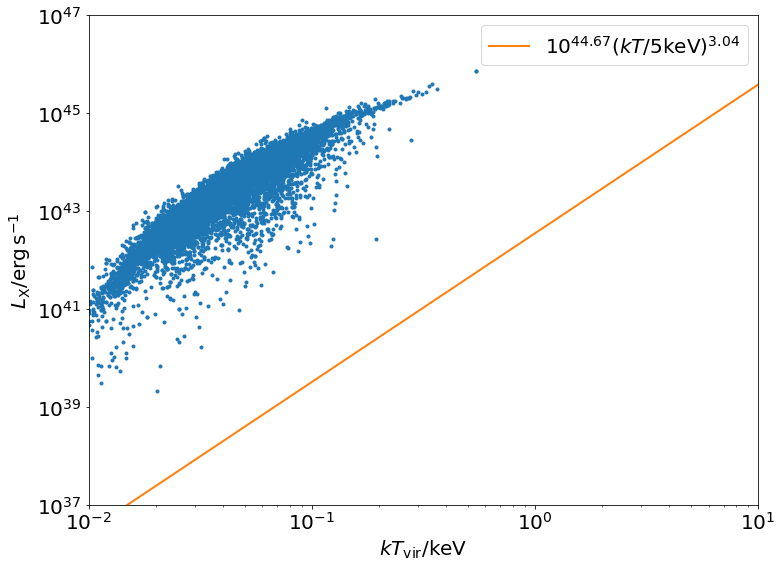

In [22]:
# Plot star-formation efficiency for central galaxy in halos (Type==0)
index0=np.where(Type==0)[0]
# Virial temperatue of halo in keV
mumH=1e-27*u.kg
x=(0.5*(Vvir[index0]*u.km/u.s)**2*mumH/u.keV).si
y=10**XrayLum[index0]
plt.figure(0,figsize=(12,9))
plt.loglog(x,y,'.')
plt.xlabel(r'$kT_\mathrm{vir}/$keV')
plt.ylabel(r'$L_\mathrm{X}/$erg$\,$s$^{-1}$')
plt.xlim([xmin,xmax])
plt.ylim([1e37,1e47])
plt.plot(np.array([xmin,xmax]),10**44.67*(np.array([xmin,xmax])/5)**3.04,label=r'$10^{44.67}(kT/5$keV$)^{3.04}$')
plt.legend()
plt.savefig('figs/XrayLum_'+outputDir.split('/')[-2]+'.png')